In [1]:
import pandas as pd
import os
import yaml

import os
os.environ['PATH'] += ":/vast/palmer/apps/avx2/software/texlive/20220321-GCC-10.2.0/bin/x86_64-linux/"

In [31]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

from src.results_utils import get_experiment_config, get_sweep_variables, get_all_results_exp, get_best_results_test, get_results_to_plot, add_hline

## alternate font/graph format
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', weight='heavy')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('axes', labelsize='x-large')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

cp = sns.color_palette("hls",12)
cp

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6312, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.6312),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5688000000000001, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999),
 (0.86, 0.33999999999999997, 0.5688000000000001)]

In [4]:
from src.dataset import SwissRoll
from src.sc_dataset import IPSC, EBData, PBMC
from src.embedding import new_HeatGeo
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

/Users/edebrouwer/miniconda3/envs/metric_embeddings/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/edebrouwer/miniconda3/envs/metric_embeddings/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/edebrouwer/miniconda3/envs/me

In [5]:
import scanpy as sc
pbmc = sc.datasets.pbmc3k_processed()
data = pbmc.X
labels = pbmc.obs["louvain"]
labels = labels.replace(to_replace=['CD4 T cells', 'CD14+ Monocytes', 'B cells', 'CD8 T cells', 'NK cells', 'FCGR3A+ Monocytes', 'Dendritic cells', 'Megakaryocytes'],
value=[0,1,2,3,4,5,6,7]
)

100%|██████████| 23.5M/23.5M [00:01<00:00, 21.2MB/s]


In [46]:
harnack_embs = np.load("../harnack_embs.npy")
tau_embs = np.load("../tau_embs.npy")
knn_embs = np.load("../knn_embs.npy")
order_embs = np.load("../order_embs.npy")
mar_order_embs = np.load("../mar_order_embs.npy")

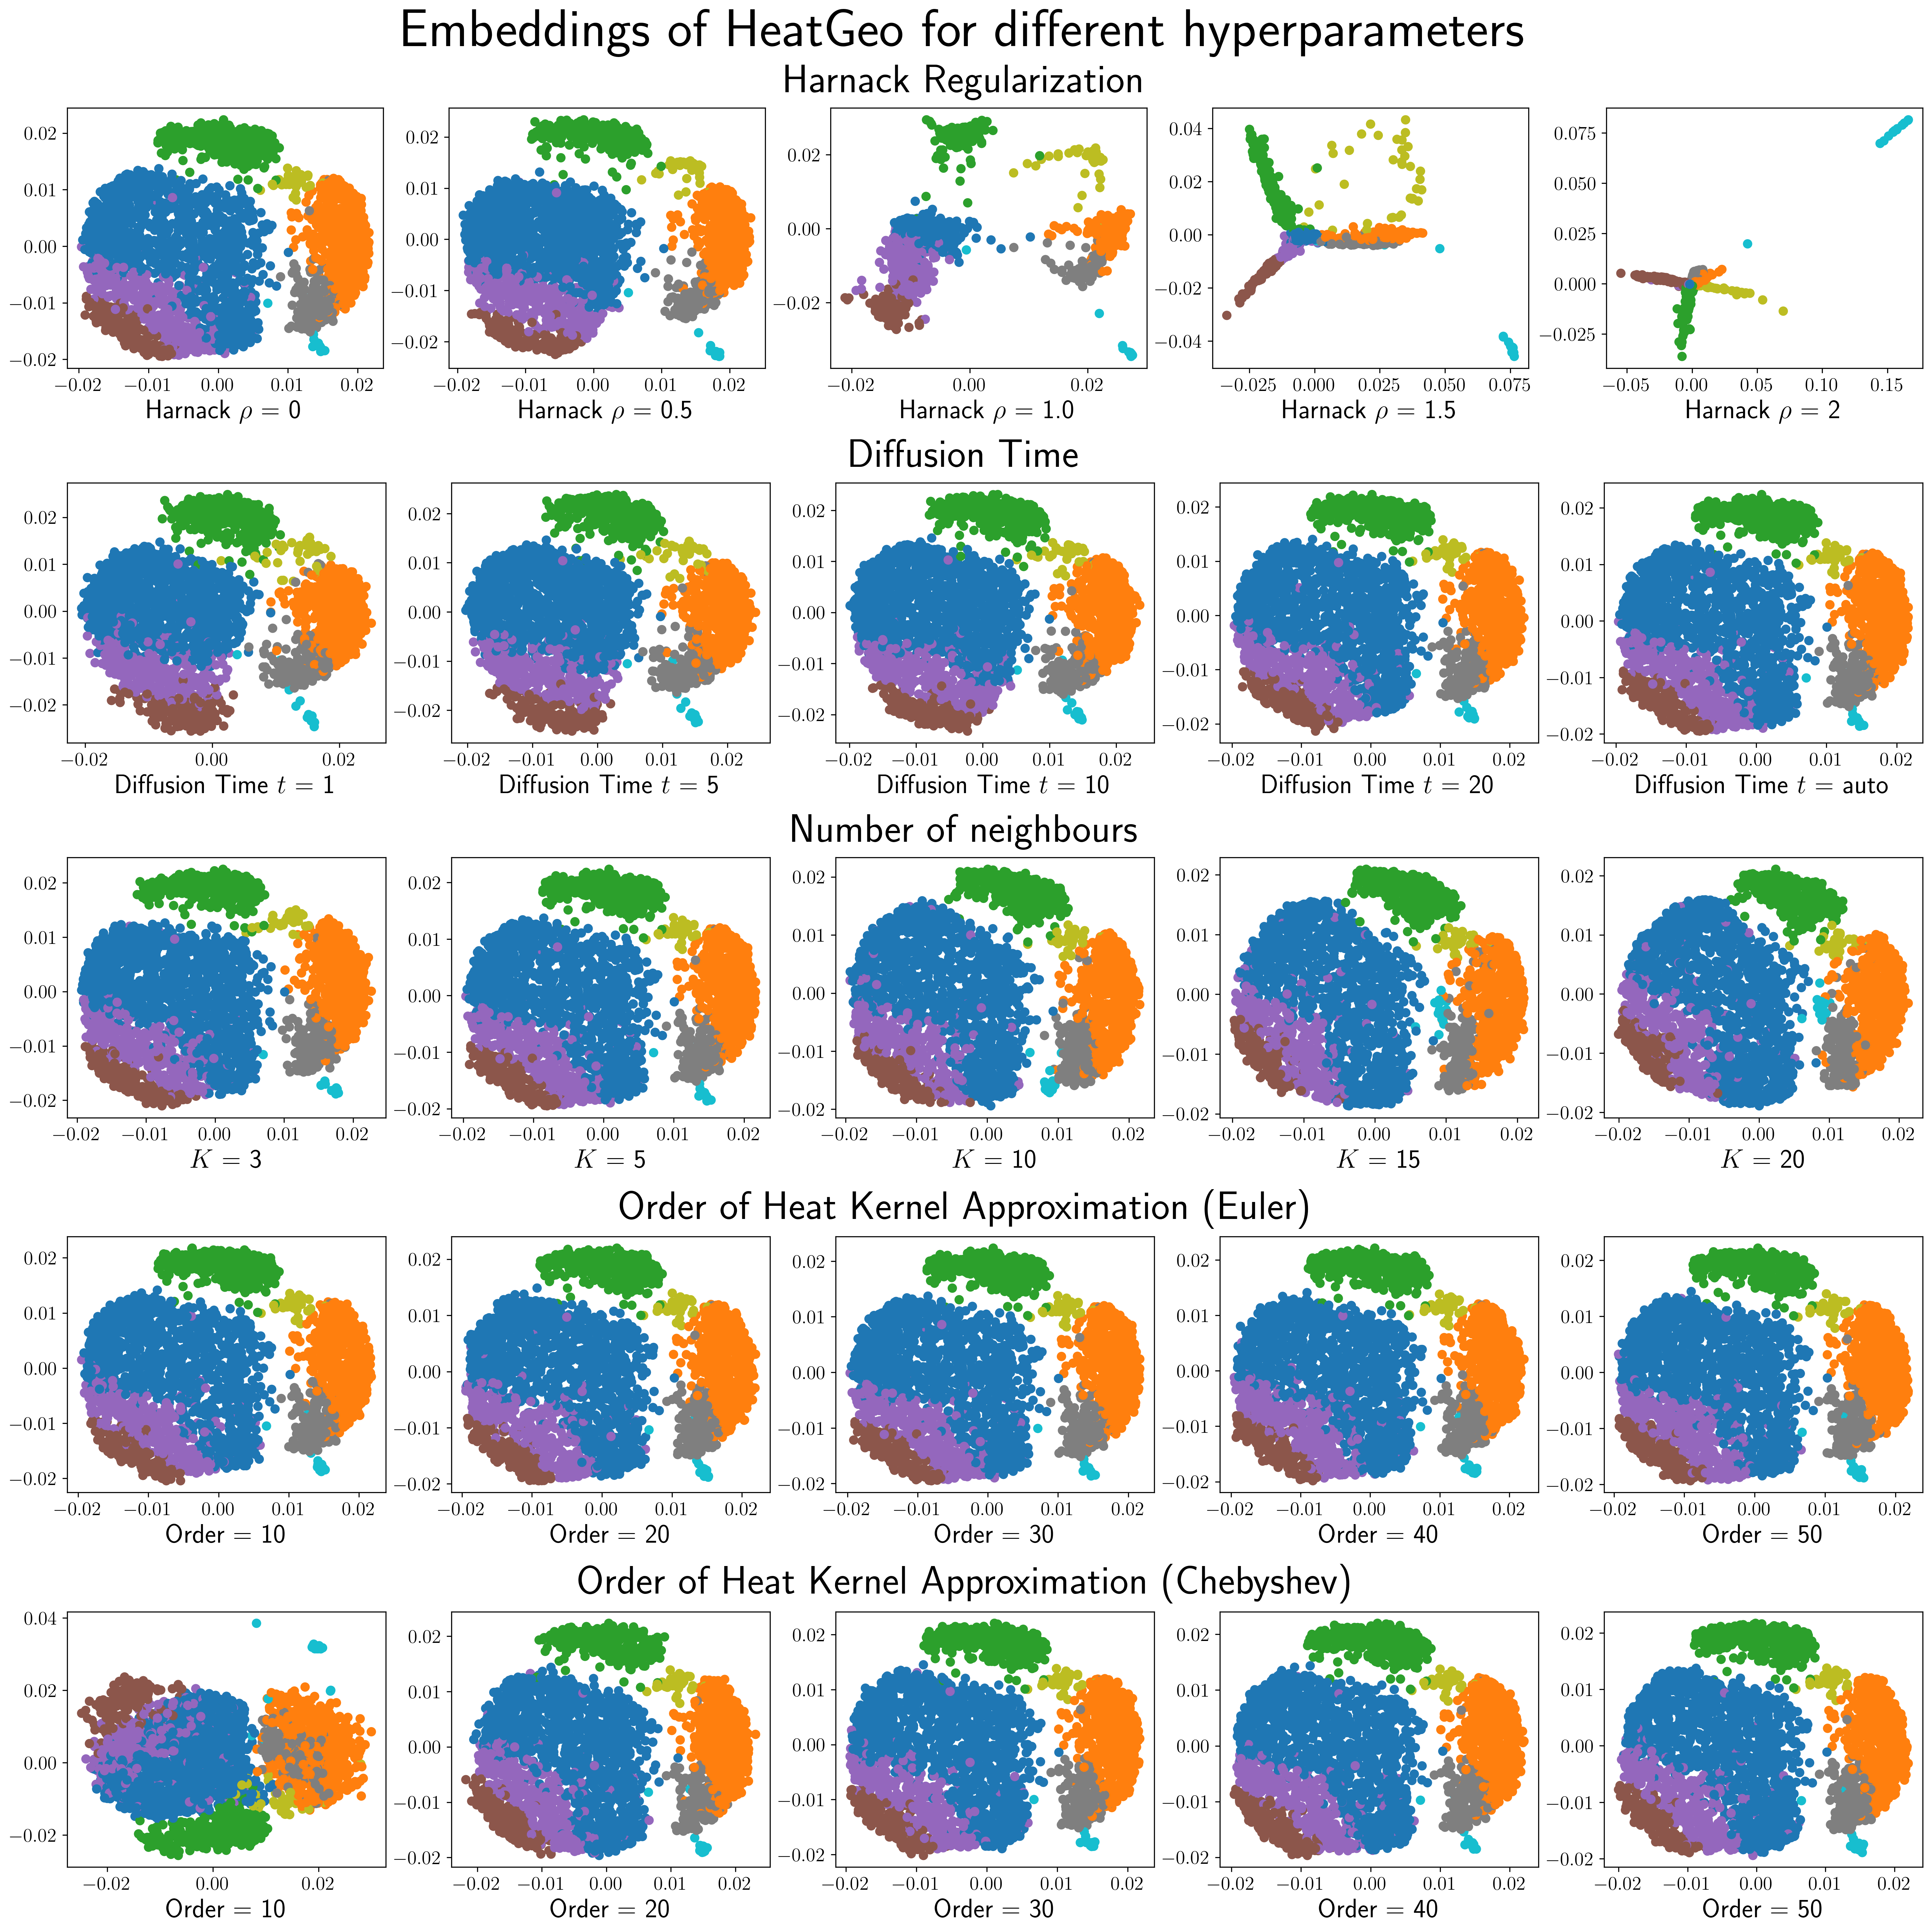

In [47]:
fig = plt.figure(constrained_layout=True, figsize = (20,20))

# fig.suptitle('Figure title')            # set global suptitle if desired

(subfig1, subfig2, subfig3, subfig4, subfig5) = fig.subfigures(5, 1) # create 2x1 subfigures
# create 1x2 subplots on subfig1
#(ax3, ax4) = subfig2.subplots(1, 5)       # create 1x2 subplots on subfig2



#fig, ax = plt.subplots(4,5,figsize=(20, 20))
j = 0
ax = subfig1.subplots(1, 5) 
subfig1.suptitle('Harnack Regularization', fontsize=30)
rhos = [0,0.5,1.0,1.5,2]
for i,emb in enumerate(harnack_embs):
    ax[i].scatter(emb[:,0], emb[:,1], c=labels, cmap="tab10")
    ax[i].set_xlabel(rf"Harnack $\rho$ = {rhos[i]}", fontsize = 20)

j+=1
ax = subfig2.subplots(1, 5) 
subfig2.suptitle('Diffusion Time', fontsize=30) 
taus = [1,5,10,20, "auto"]
for i,emb in enumerate(tau_embs):
    ax[i].scatter(emb[:,0], emb[:,1], c=labels, cmap="tab10")
    ax[i].set_xlabel(rf"Diffusion Time $t$ = {taus[i]}", fontsize = 20)

j+=1
ax = subfig3.subplots(1, 5) 
subfig3.suptitle('Number of neighbours', fontsize=30) 
ks = [3,5,10,15,20]
for i,emb in enumerate(knn_embs):
    ax[i].scatter(emb[:,0], emb[:,1], c=labels, cmap="tab10")
    ax[i].set_xlabel(rf"$K$ = {ks[i]}", fontsize = 20)

j+=1
ax = subfig4.subplots(1, 5) 
subfig4.suptitle('Order of Heat Kernel Approximation (Euler)', fontsize=30)
orders = [10,20,30,40,50]
for i,emb in enumerate(order_embs):
    ax[i].scatter(emb[:,0], emb[:,1], c=labels, cmap="tab10")
    ax[i].set_xlabel(rf"Order = {orders[i]}", fontsize = 20)

j+=1
ax = subfig5.subplots(1, 5) 
subfig5.suptitle('Order of Heat Kernel Approximation (Chebyshev)', fontsize=30)
orders = [10,20,30,40,50]
for i,emb in enumerate(mar_order_embs):
    ax[i].scatter(emb[:,0], emb[:,1], c=labels, cmap="tab10")
    ax[i].set_xlabel(rf"Order = {orders[i]}", fontsize = 20)

fig.suptitle("Embeddings of HeatGeo for different hyperparameters", fontsize = 40)
plt.show()

In [46]:
harnack_embs = []
for harnack_regul in [0,0.5,1.0,1.5,2]:
    print(harnack_regul)
    model = new_HeatGeo(tau = "auto", order = 30, knn=5, filter_method = "euler", log_normalize = False, emb_dim=2, harnack_regul = harnack_regul) #mds_weights_type="heat_kernel", scale_factor=2)  

    emb = model.fit_transform(data)

    harnack_embs.append(emb)

0
Optimal tau:  [22.26666667]
Using s_gd2 for MDS. None
0.5
Optimal tau:  [22.26666667]
Using s_gd2 for MDS. None
1.0
Optimal tau:  [22.26666667]
Using s_gd2 for MDS. None
1.5
Optimal tau:  [22.26666667]
Using s_gd2 for MDS. None
2
Optimal tau:  [22.26666667]
Using s_gd2 for MDS. None


In [47]:
np.save("harnack_embs.npy", harnack_embs)

In [49]:
np.load("harnack_embs.npy", allow_pickle=True).shape

(5, 2638, 2)

In [ ]:
knn_embs = []
for knn in [3,5,10,15,20]:

    model = new_HeatGeo(tau = "auto", order = 30, knn=knn, filter_method = "euler", log_normalize = False, emb_dim=2, harnack_regul = 0.) #mds_weights_type="heat_kernel", scale_factor=2)  

    emb = model.fit_transform(data)

    knn_embs.append(emb)

In [ ]:
order_embs = []

for order in [10,20,30,40,50]:

    model = new_HeatGeo(tau = "auto", order = order, knn = 5, filter_method = "euler", log_normalize = False, emb_dim=2, harnack_regul = 0.) #mds_weights_type="heat_kernel", scale_factor=2)  

    emb = model.fit_transform(data)

    order_embs.append(emb)

In [ ]:
tau_embs = []

for tau in [1,5,10,20, "auto"]:

    model = new_HeatGeo(tau = tau, order = 30, knn = 5, filter_method = "euler", log_normalize = False, emb_dim=2, harnack_regul = 0.) #mds_weights_type="heat_kernel", scale_factor=2)  

    emb = model.fit_transform(data)

    tau_embs.append(emb)

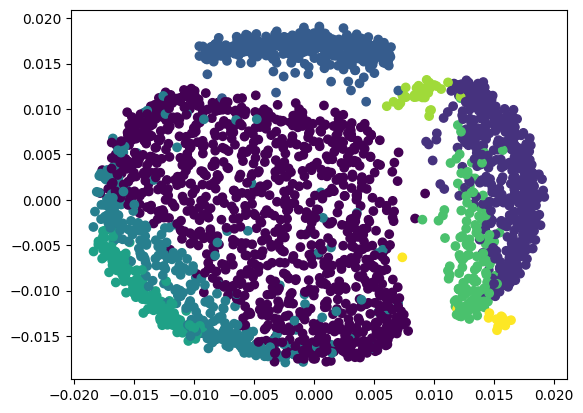

In [38]:
plt.scatter(emb[:,0], emb[:,1], c=labels.values)

In [14]:
labels

array([2, 3, 2, 3, 3, 4, 1, 0, 2, 2, 3, 4, 3, 1, 4, 1, 1, 2, 3, 3, 2, 4,
       2, 3, 3, 1, 4, 0, 2, 3, 0, 4, 2, 4, 3, 0, 4, 3, 4, 1, 4, 3, 1, 2,
       1, 0, 3, 1, 4, 1, 0, 4, 2, 1, 1, 4, 1, 1, 3, 2, 0, 1, 0, 3, 2, 3,
       2, 2, 3, 2, 3, 0, 3, 3, 2, 1, 3, 1, 0, 2, 1, 1, 4, 3, 1, 1, 4, 3,
       1, 3, 3, 2, 1, 1, 3, 1, 1, 4, 4, 4, 1, 1, 2, 2, 1, 2, 0, 0, 1, 2,
       4, 1, 4, 2, 2, 2, 4, 3, 1, 4, 1, 4, 1, 1, 3, 3, 2, 0, 1, 0, 2, 3,
       0, 4, 0, 3, 2, 2, 0, 4, 1, 2, 1, 2, 2, 4, 0, 2, 4, 2, 0, 1, 4, 2,
       4, 0, 4, 3, 1, 2, 2, 0, 0, 1, 3, 1, 0, 3, 4, 2, 3, 1, 0, 1, 3, 1,
       3, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 4, 2, 1, 2, 2, 2,
       3, 0, 3, 2, 1, 3, 0, 1, 1, 3, 2, 0, 1, 3, 0, 2, 3, 4, 2, 2, 3, 4,
       3, 3, 4, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0, 3, 1, 2, 4, 0, 3, 3, 2, 3,
       0, 1, 3, 4, 3, 3, 4, 1, 2, 1, 4, 4, 1, 2, 4, 3, 4, 4, 4, 0, 2, 2,
       1, 3, 1, 2, 3, 1, 1, 4, 1, 2, 1, 2, 2, 0, 0, 3, 3, 2, 4, 1, 1, 4,
       4, 0, 2, 2, 3, 4, 4, 4, 1, 3, 1, 2, 2, 1, 1,